[38 29 44 42 40 48 54 54 49 56 60 65 69 82 74 78 75 74 73 77 80 66 83 73
 71 99 78 93 74 90 86 57 61 40 56 50 30 23 23 10 10 12  6  4  4  2  1  0
  1  3]
298.73053620918927 -469.05755162978267 1.7353761852346663


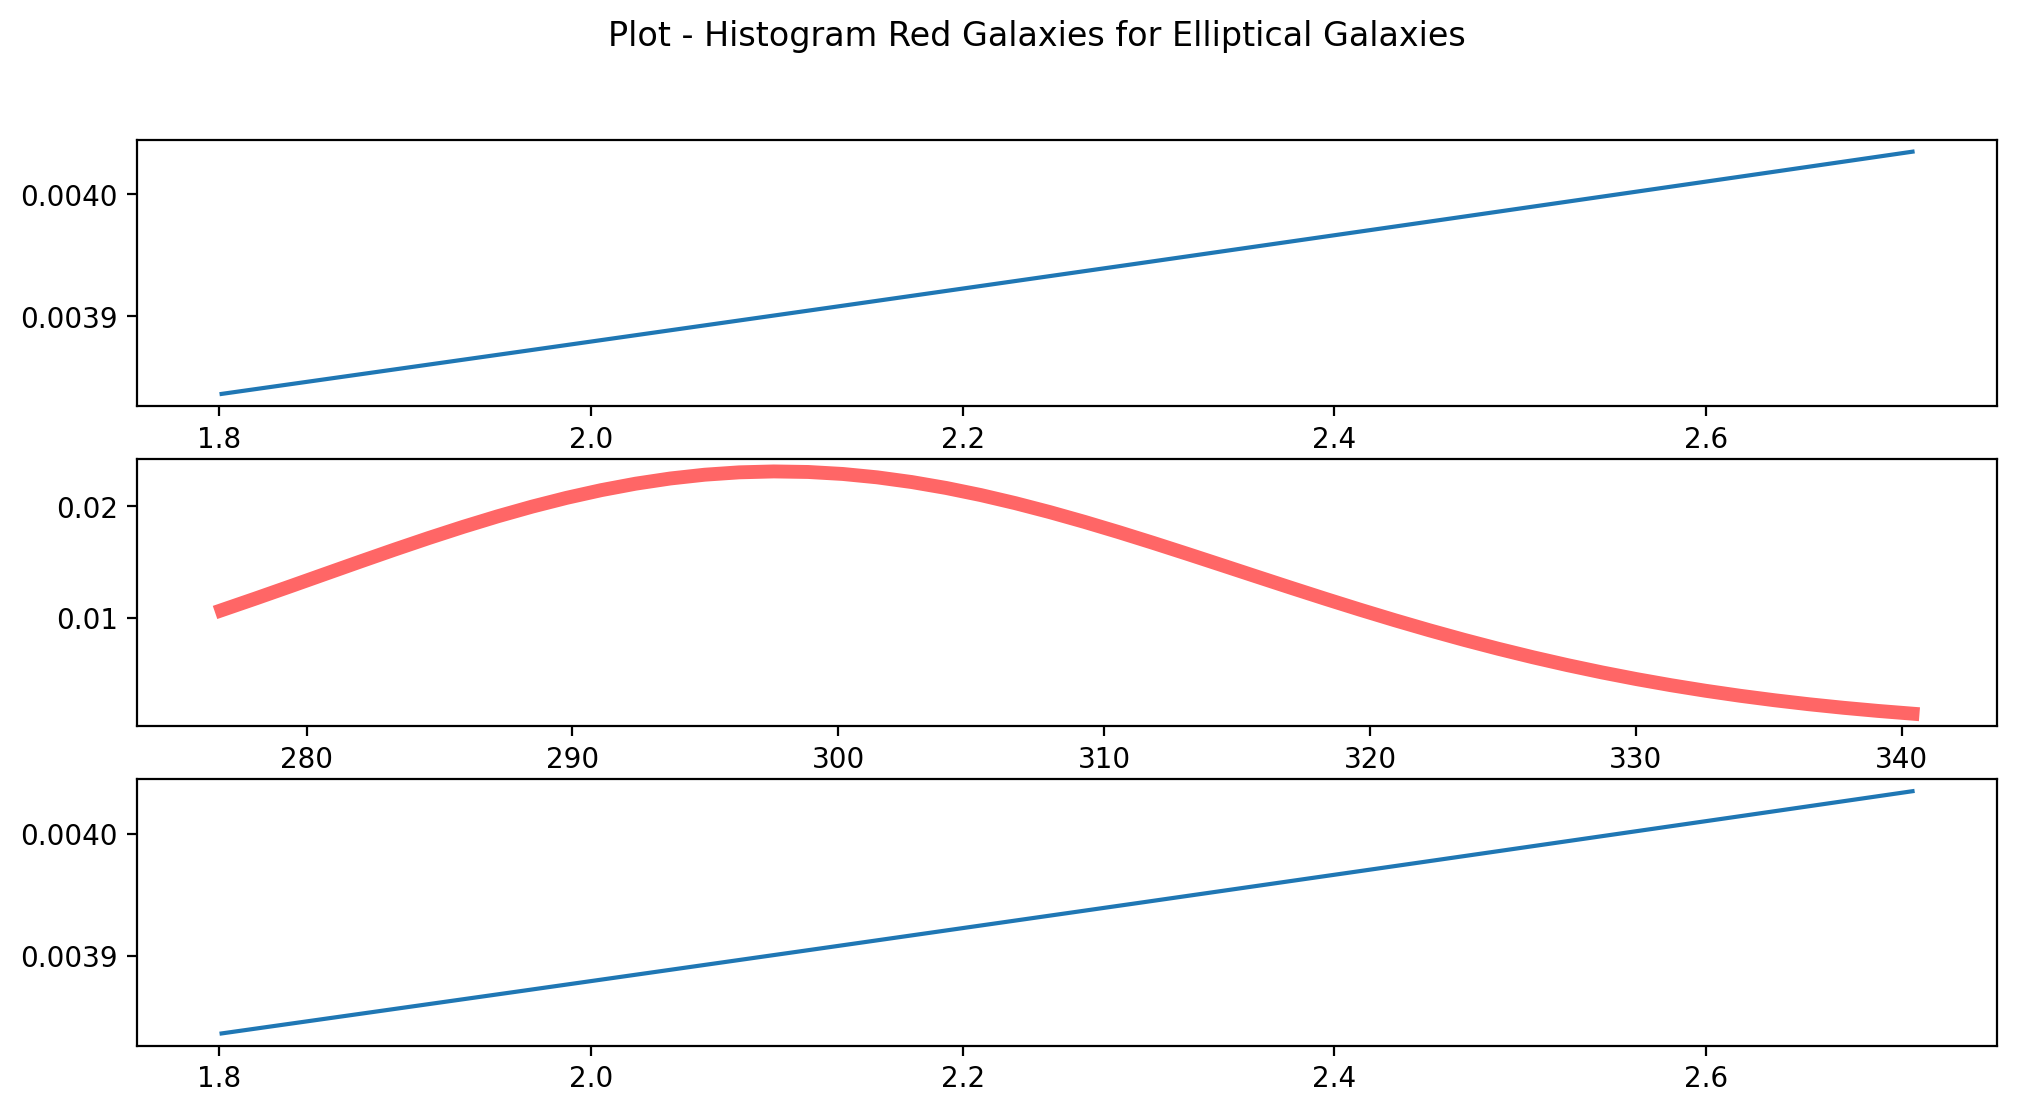

In [3]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot

RawMassEClassEmeasure = Table.read('../../GAMA_Data/REMassEClassEmeasure.fits')
#print(RawMassEClassEmeasure.colnames)
# CLEAN DATA
#REMassEClassEmeasure = RawMassEClassEmeasure[RawMassEClassEmeasure['CountInCyl']> -500]
RErange = RawMassEClassEmeasure[RawMassEClassEmeasure['CountInCyl']> -500]
RErange1 = RErange[RErange['SurfaceDensity']< 50]

binCount = 50
alphaVal = .3

##### uminusr
fig = plt.figure(figsize=(12, 6), dpi=200)
fig.suptitle('Plot - Histogram Red Galaxies for Elliptical Galaxies')
from scipy import stats
xfield = 'uminusr'
counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
print(counts)
ag, bg, cg =stats.gamma.fit(counts)
print(ag, bg, cg)
xmin = min(RErange1[xfield])
xmax = max(RErange1[xfield])
#xlin = np.linspace(xmin,xmax,binCount)
xlin = np.linspace(xmin,xmax,len(RErange1[xfield]))
ax1 = fig.add_subplot(3, 1, 1)
#ax1.hist(counts,bins=binCount,density=True)
#ax1.hist(RErange1[xfield].data,bins=binCount)
ax1.plot(xlin,stats.gamma.pdf(xlin,a=ag,loc=bg, scale =cg))

ax2 = fig.add_subplot(3, 1, 2)
#ax2.set_ylabel('Galaxy Count')
#ax2.set_xlabel(xfield)
#ax2.hist(bins[:-1],bins, weights=counts)
#ax2 = fig.add_subplot(3, 1, 2)
x = np.linspace(stats.gamma.ppf(0.1, ag),stats.gamma.ppf(0.99, ag), binCount)
ax2.plot(x, stats.gamma.pdf(x, ag),'r-', lw=5, alpha=0.6, label='gamma pdf')

ax3 = fig.add_subplot(3, 1, 3)
#ax3.hist(RErange1[xfield].data,bins=binCount,density=True)
pdf_gamma = stats.gamma.pdf(xlin, ag, bg,cg)  
ax3.plot(xlin, pdf_gamma, label="Gamma")
#ax3.plot(x, stats.gamma.pdf(x, ag),'r-', lw=5, alpha=0.6, label='gamma pdf')

plt.show()

